# Hidden Markov Model
Hidden Markov Model is unsupervised generative model. It assumes that the probabilities of changing from state to another are known.

The idea is to predict future states from current state. The predicted state doesn't have to be the next one, but then you have to make predictions for all the intermediate states as well. This will produce a chain of predictions.

Classifiers can be either `discriminative` or `generative` ([read more](https://stats.stackexchange.com/questions/12421/generative-vs-discriminative)). Generative models do not set hard limits between identified classes. HMM is generative, as it <b>does have</b> an assumption about how the underlying data was generated.

`hmmlearn` python library performs unsupervised learning.

These variables can be defined manually or you can calculate them from data automatically with the `.fit` function:
* startprob_
* transmat_
* means_
* covars_

In [11]:
from hmmlearn import hmm
import numpy as np
import matplotlib.pyplot as plt
#hmm makes warnings about upcoming deprecations, ignore them
import warnings
warnings.simplefilter("ignore")

## Helper functions

In [3]:
#Data from two samples or "states"
d_1 = [1,2,4,3,2,4,10,6,9,8,7,10,7,2]
d_2 = [15,11,19,19,15,14,12,13,16,16,16,15,19,17]

#Plot values
def plot_list(d):
    plt.bar(range(len(d)), d)
    plt.plot([0,27],[10.5,10.5], color="red")
    plt.show()
    
#Print states
def print_states(model):
    for i in range(model.n_components):
        print('\nHidden state', i+1)
        print('Mean =', round(model.means_[i][0], 2))
        print('Variance =', round(np.diag(model.covars_[i])[0], 2))
        
#Print summary for each list in the list
def print_summary(d_list):
    i=0
    for d_i in d_list:
        i+=1
        print('\nList', i)
        print('Mean =', round(np.mean(d_i), 2))
        print('Variance =', round(np.var(d_i), 2))

## Create data and fit the model

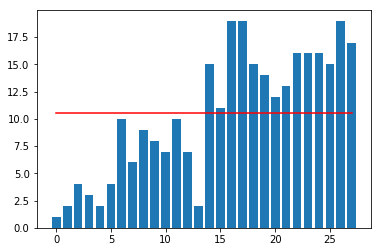


Hidden state 1
Mean = 15.5
Variance = 5.82

Hidden state 2
Mean = 5.37
Variance = 9.44

List 1
Mean = 5.36
Variance = 9.37

List 2
Mean = 15.5
Variance = 5.82


In [4]:
#Concatencate and transpose the full list 
d = np.transpose([d_1+d_2])

#Fit model
model = hmm.GaussianHMM(n_components=2, covariance_type="diag", n_iter=100)
model.fit(d)

#Output
plot_list(d)
print_states(model)
print_summary([d_1,d_2])

## Try the same after shuffling the values
Now the variance will be much higher because the order is random. But the result are still satisfying for some cases.

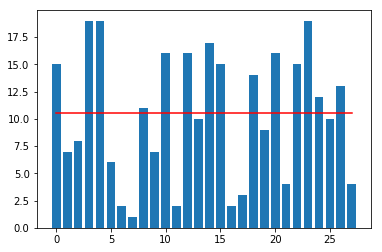


Hidden state 1
Mean = 15.61
Variance = 5.7

Hidden state 2
Mean = 5.61
Variance = 10.81

List 1
Mean = 5.36
Variance = 9.37

List 2
Mean = 15.5
Variance = 5.82


In [10]:
#Concatencate and transpose the full list 
d_rand = np.random.shuffle(d)

#Fit model
model = hmm.GaussianHMM(n_components=2, covariance_type="diag", n_iter=1000)
model.fit(d)

#Output
plot_list(d)
print_states(model)
print_summary([d_1,d_2])